# Day 5 – Bias Variance Tradeoff

To see the bias-variance tradeoff in action, we'll fit several polynomial regression models with varying degrees of complexity.

- A low-degree polynomial (e.g., degree 1) is a simple model (low variance, high bias).

- A high-degree polynomial (e.g., degree 10) is a complex model (high variance).


## Load & Prepare Data

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the engineered dataset from Day 3
df = pd.read_csv('/Users/amrithaa/Downloads/12DayDataSeries/notebooks/data/encoded_data.csv')


# Define target and features
y = df['mission_success_score']
X = df.drop(columns=[
    'mission_id', 
    'mission_success_score', 
    'mission_outcome', 
    'duration_bin_medium', 
    'duration_bin_long', 
    'risk_score'
])

# Convert boolean columns to integer (0 or 1)
X['mission_type_Rescue'] = X['mission_type_Rescue'].astype(int)
X['mission_type_Resupply'] = X['mission_type_Resupply'].astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (297, 11)
Test set shape: (128, 11)


## Modeling the tradeoff

In [7]:
train_errors, test_errors = [], []
degrees = range(1, 11)

for degree in degrees:
    # Create a pipeline that adds polynomial features, then fits a linear regression model
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict on the training data and calculate error
    y_train_pred = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)
    
    # Predict on the test data and calculate error
    y_test_pred = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)

## Visualize the Results

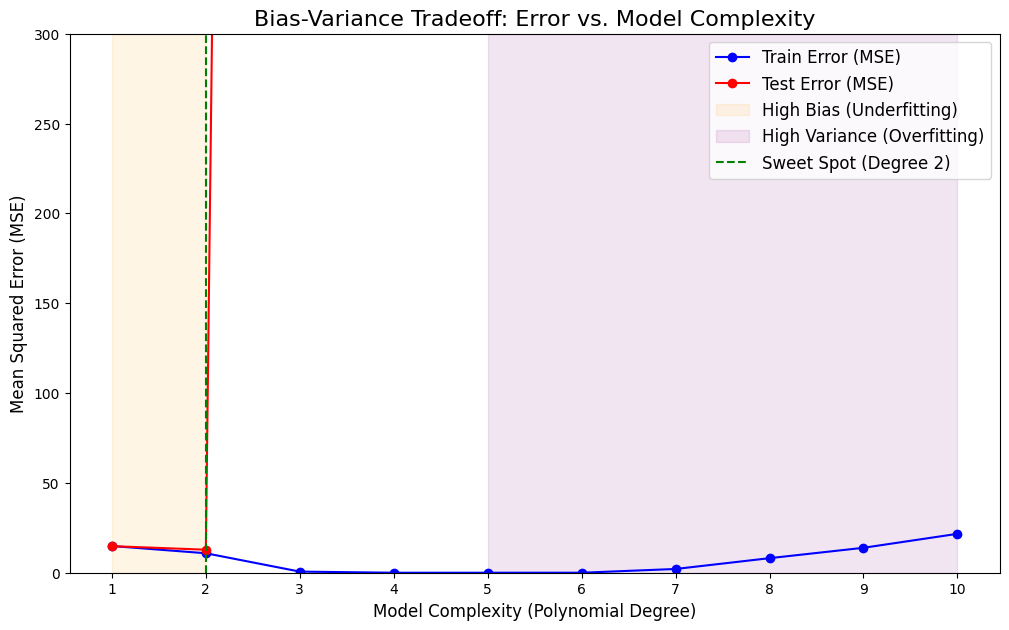

The model with the lowest test error has a polynomial degree of 2.
Minimum Test MSE: 12.81


In [8]:
plt.figure(figsize=(12, 7))

# Plot training and test errors
plt.plot(degrees, train_errors, 'o-', color='blue', label='Train Error (MSE)')
plt.plot(degrees, test_errors, 'o-', color='red', label='Test Error (MSE)')

# Find the best degree (minimum test error)
best_degree = degrees[np.argmin(test_errors)]
min_test_error = np.min(test_errors)

# Annotations and labels
plt.title('Bias-Variance Tradeoff: Error vs. Model Complexity', fontsize=16)
plt.xlabel('Model Complexity (Polynomial Degree)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(degrees)
plt.legend(fontsize=12)
plt.ylim(0, 300) # Adjust y-axis for better visibility

# Highlight key areas
plt.axvspan(1, 2, color='orange', alpha=0.1, label='High Bias (Underfitting)')
plt.axvspan(5, 10, color='purple', alpha=0.1, label='High Variance (Overfitting)')
plt.axvline(x=best_degree, color='green', linestyle='--', label=f'Sweet Spot (Degree {best_degree})')

plt.legend(fontsize=12)
plt.show()

print(f"The model with the lowest test error has a polynomial degree of {best_degree}.")
print(f"Minimum Test MSE: {min_test_error:.2f}")

## Conclusion
The sweet spot is at a polynomial degree of 2.

This is the point where the Test Error (the red line) is at its lowest, indicating the model has the best balance between bias and variance for making accurate predictions on unseen data. 

### Takeaway

- High Bias (Underfitting): At degree 1, the model is too simple. It has high error on both the training and test sets because it can't capture the underlying patterns.

- High Variance (Overfitting): From degree 5 onwards, the model becomes too complex. The training error plummets to near-zero as the model begins to memorize the training data, including its noise. Consequently, its performance on the unseen test data degrades dramatically, shown by the sharp rise in test error.

- The "Goldilocks" Zone: A degree 2 polynomial is just right. It's complex enough to capture the true relationship in the data but simple enough that it doesn't overfit the noise, allowing it to generalize well to new data.